In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 퍼셉트론 구현

In [2]:
#AND
def AND(x1 , x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <=theta:
        return 0
    elif tmp > theta:
        return 1

In [3]:
and_list=np.array([0,1])
for i in and_list:
    a1 = AND(1, i) #1,0 1,1
    a2 = AND(0, i) #0,0 0,1일때 값들
    print('출력값은:', a1)
    print('출력값은:', a2) #처음 내가 생각한 것

출력값은: 0
출력값은: 0
출력값은: 1
출력값은: 0


In [34]:
#강의 시 좋은 방법
and_list = [(0,0), (0,1), (1,0), (1,1)]
for i in and_list:
    y = AND(i[0], i[1])
    print(str(i), '->', str(y))

(0, 0) -> 0
(0, 1) -> 0
(1, 0) -> 0
(1, 1) -> 1


In [4]:
#강의 시 좋은 방법
and_list = np.array([0,0], [0,1], [1,0], [0,0]) #오류 수정 필요 2차원 어레이로 만들기
for i in and_list:
    y = AND(i[0], i[1])
    print(str(i), '->', str(y)) #이렇게는 또 오류가 발생하네

TypeError: array() takes from 1 to 2 positional arguments but 4 were given

In [33]:
#내 방식
and_list = np.array([[0,0], 
                     [0,1], 
                     [1,0], 
                     [0,0]]) #오류 수정 필요 2차원 어레이로 만들기
for i in and_list:
    y = AND(i[0], i[1])
    print(str(i), '->', str(y))

[0 0] -> 0
[0 1] -> 0
[1 0] -> 0
[0 0] -> 0


In [6]:
#넘파이를 이용하여 편하게 수정
and_list = np.array([[0,0], [0,1], [1,0], [1,1]])
Y=[]
for i in and_list:
    y = AND(i[0], i[1])
    Y.append(y)
print(Y) #값들 리스트에 담기

[0, 0, 0, 1]


In [7]:
x1 = [0,1] *2
x2 = [0, 0, 1, 1]

In [8]:
#로직 데이터 프레임으로 구현
AND_df=pd.DataFrame({
    'x1' : x1,
    'x2' : x2,
    'y' : Y
})
AND_df = AND_df.set_index(['x1', 'x2'])
AND_df

,,y
x1,x2,
0,0,0
1,0,0
0,1,0
1,1,1


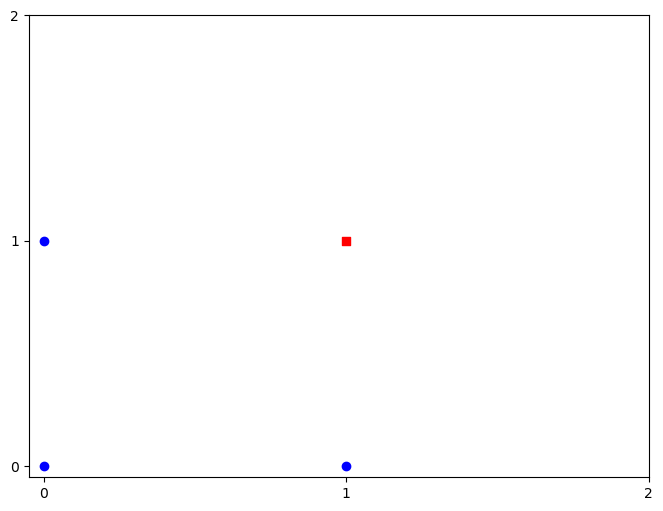

In [9]:
#시각화 구현
plt.figure(figsize=(8,6))
plt.scatter(x=0, y=0, color = 'b', edgecolor='b', marker='o')
plt.scatter(x=0, y=1, color = 'b', edgecolor='b', marker='o')
plt.scatter(x=1, y=0, color='b', edgecolor='b')
plt.scatter(x=1, y=1, color = 'r', edgecolors='r', marker = 's')
plt.xticks(np.arange(0,3,1))
plt.yticks(np.arange(0,3,1))
plt.show()
#위의 데이터 프레임을 봤을 때 1,1만 출력됨. 그렇게 만드는 직선은 어떻게 만들까? 여러가지 가능 #어떻게 4사분면 코드를 이렇게 작성함?

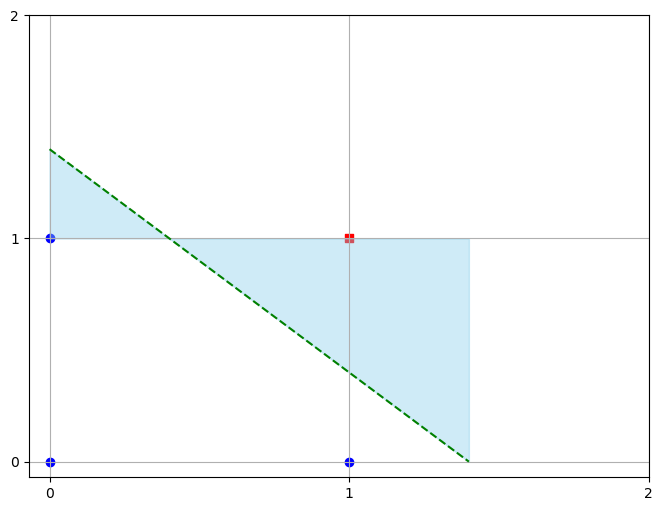

In [35]:
w1 = 0.5
w2 = 0.5
b = -1*0.7
#파라미터 처럼 모델을 보고 조정하는 값
x1 = np.arange(0, 1.5 ,0.1) 
# b+w1*x1 + w2*x2 =0
x2 = (-0.5*x1 + 0.7)/0.5 #이항
#시각화 구현
plt.figure(figsize=(8,6))
plt.scatter(x=0, y=0, color = 'b', edgecolor='b', marker='o')
plt.scatter(x=0, y=1, color = 'b', edgecolor='b', marker='o')
plt.scatter(x=1, y=0, color='b', edgecolor='b')
plt.scatter(x=1, y=1, color = 'r', edgecolors='r', marker = 's')
plt.fill_between(x1, x2, np.max(y),
                 color="skyblue", alpha=0.4)

plt.plot(x1, x2, linestyle = '--', color = 'g')
plt.xticks(np.arange(0,3,1))
plt.yticks(np.arange(0,3,1))
plt.grid()
plt.show()
#위의 데이터 프레임을 봤을 때 1,1만 출력됨. 그렇게 만드는 직선은 어떻게 만들까? 여러가지 가능 #어떻게 4사분면 코드를 이렇게 작성함?
#부등호 영역 시각화 어케함 이것도 이상함.

In [11]:
#NAND
#가중치와 편향 도입
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5]) #이렇게 표현해도 가능
    b = 0.7 #NAND는 가중치 편향에 -1곱한것과 같음
    tmp = np.sum(x*w) + b #브로드 캐스트로 쉽게 가능
    if tmp<=0:
        return 0
    else:
        return 1

In [12]:
#OR
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2 #NAND는 가중치 편향에 -1곱한것과 같음
    tmp = np.sum(x*w) + b #브로드 캐스트로 쉽게 가능
    if tmp<=0:
        return 0
    else:
        return 1

In [13]:
#NAND
and_list = [(0,0), (0,1), (1,0), (1,1)]
for i in and_list:
    y = NAND(i[0], i[1])
    print(str(i), '->', str(y))

(0, 0) -> 1
(0, 1) -> 1
(1, 0) -> 1
(1, 1) -> 0


In [14]:
and_list = np.array([[0,0], [0,1], [1,0], [1,1]])
Y=[]
for i in and_list:
    y = NAND(i[0], i[1])
    Y.append(y)
print(Y) #값들 리스트에 담기

[1, 1, 1, 0]


In [15]:
x1 = [0,1] *2
x2 = [0, 0, 1, 1]

In [16]:
NAND_df=pd.DataFrame({
    'x1' : x1,
    'x2' : x2,
    'y' : Y
})
NAND_df = NAND_df.set_index(['x1', 'x2'])
NAND_df

,,y
x1,x2,
0,0,1
1,0,1
0,1,1
1,1,0


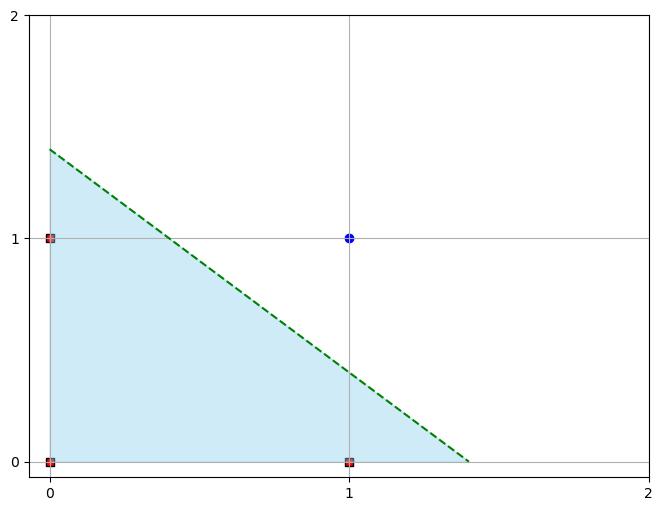

In [17]:
w1 = -0.5
w2 = -0.5
b = 0.7
#파라미터 처럼 모델을 보고 조정하는 값
x1 = np.arange(0, 1.5 ,0.1) 
# b+w1*x1 + w2*x2 =0
x2 = (0.5*x1 -0.7)/0.5*(-1) #이항 #역치기 때문에 -1곱하나 안곱하나 그래프는 똑같아
#시각화 구현
plt.figure(figsize=(8,6))
plt.scatter(x=0, y=0, color = 'r', edgecolor='k', marker='s')
plt.scatter(x=0, y=1, color = 'r', edgecolor='k', marker='s')
plt.scatter(x=1, y=0, color='r', edgecolor='k', marker= 's')
plt.scatter(x=1, y=1, color = 'b', edgecolors='b', marker = 'o')

plt.fill_between(x1, x2,
                 color="skyblue", alpha=0.4)

plt.plot(x1, x2, linestyle = '--', color = 'g')
plt.xticks(np.arange(0,3,1))
plt.yticks(np.arange(0,3,1))
plt.grid()
plt.show()
#위의 데이터 프레임을 봤을 때 1,1만 출력됨. 그렇게 만드는 직선은 어떻게 만들까? 여러가지 가능 #어떻게 4사분면 코드를 이렇게 작성함?
#부등호 영역 시각화 어케함 이것도 이상함.

In [18]:
#OR
and_list = [(0,0), (0,1), (1,0), (1,1)]
for i in and_list:
    y = OR(i[0], i[1])
    print(str(i), '->', str(y))

(0, 0) -> 0
(0, 1) -> 1
(1, 0) -> 1
(1, 1) -> 1


In [19]:
and_list = np.array([[0,0], [0,1], [1,0], [1,1]])
Y=[]
for i in and_list:
    y = OR(i[0], i[1])
    Y.append(y)
print(Y) #값들 리스트에 담기

[0, 1, 1, 1]


In [20]:
x1 = [0,1] *2
x2 = [0, 0, 1, 1]

In [21]:
OR_df=NAND_df.drop('y', axis=1)
OR_df['y'] = Y
OR_df

,,y
x1,x2,
0,0,0
1,0,1
0,1,1
1,1,1


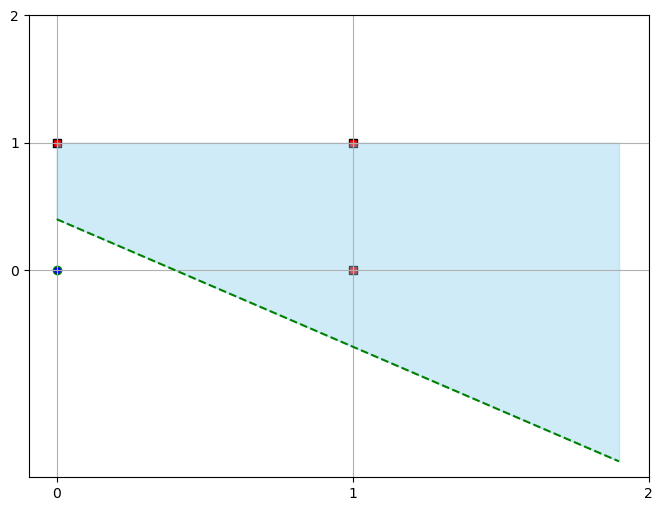

In [22]:
w1 = 0.5
w2 = 0.5
b = -0.2
#파라미터 처럼 모델을 보고 조정하는 값
x1 = np.arange(0, 2 ,0.1) 
# b+w1*x1 + w2*x2 =0
x2 = (-0.5*x1 +0.2)/0.5 #이항 #역치기 때문에 -1곱하나 안곱하나 그래프는 똑같아
#시각화 구현
plt.figure(figsize=(8,6))
plt.scatter(x=0, y=0, color = 'b', edgecolor='g', marker='o')
plt.scatter(x=0, y=1, color = 'r', edgecolor='k', marker='s')
plt.scatter(x=1, y=0, color='r', edgecolor='k', marker='s')
plt.scatter(x=1, y=1, color = 'r', edgecolors='k', marker = 's')

plt.fill_between(x1, x2,np.max(y),
                 color="skyblue", alpha=0.4)

plt.plot(x1, x2, linestyle = '--', color = 'g')
plt.xticks(np.arange(0,3,1))
plt.yticks(np.arange(0,3,1))
plt.grid()
plt.show()
#위의 데이터 프레임을 봤을 때 1,1만 출력됨. 그렇게 만드는 직선은 어떻게 만들까? 여러가지 가능 #어떻게 4사분면 코드를 이렇게 작성함?
#부등호 영역 시각화 어케함 이것도 이상함.

In [23]:
#XOR
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y=AND(s1, s2)
    return y

In [24]:
for i in np.array([[0, 0], 
                    [1, 0], 
                    [0, 1], 
                    [1, 1]]):
    y=XOR(i[0], i[1])
    print(str(i), '->', str(y))

[0 0] -> 0
[1 0] -> 1
[0 1] -> 1
[1 1] -> 0


In [25]:
#데이터 프레임으로 만들기
and_list = np.array([[0,0], [0,1], [1,0], [1,1]])
Y=[]
S1= []
S2 = []
for i in and_list:
    y = XOR(i[0], i[1])
    s1 = NAND(i[0], i[1])
    s2 = OR(i[0], i[1])
    Y.append(y)
    S1.append(s1)
    S2.append(s2)
print(Y) #값들 리스트에 담기
print(S1)
print(S2)

[0, 1, 1, 0]
[1, 1, 1, 0]
[0, 1, 1, 1]


In [26]:
x1 = [0,1] *2
x2 = [0, 0, 1, 1]

In [27]:
XOR_df=pd.DataFrame({
    'x1' : x1,
    'x2' : x2,
    's1' : S1,
    's2' : S2,
    'y' : Y
})
XOR_df = XOR_df.set_index(['x1', 'x2', 's1', 's2'])
XOR_df #데이터 프레임 사이즈는 어떻게 조정하는가

,,,,y
x1,x2,s1,s2,
0,0,1,0,0
1,0,1,1,1
0,1,1,1,1
1,1,0,1,0


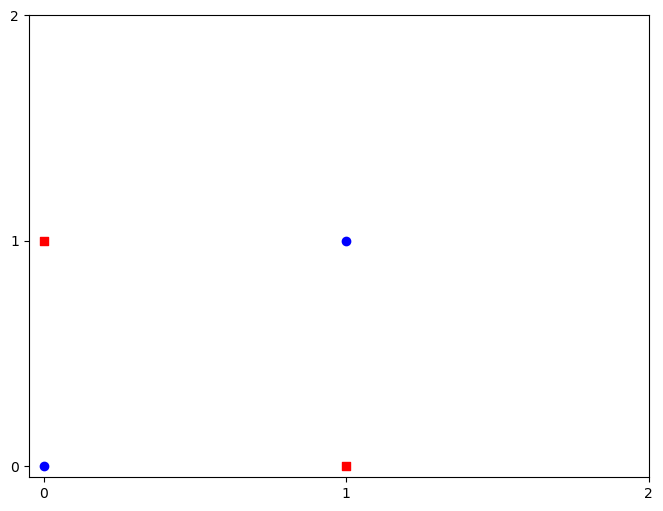

In [28]:
#시각화 구현
plt.figure(figsize=(8,6))
plt.scatter(x=0, y=0, color = 'b', edgecolor='b', marker='o')
plt.scatter(x=0, y=1, color = 'r', edgecolor='r', marker='s')
plt.scatter(x=1, y=0, color='r', edgecolor='r', marker = 's')
plt.scatter(x=1, y=1, color = 'b', edgecolors='b', marker = 'o')
plt.xticks(np.arange(0,3,1))
plt.yticks(np.arange(0,3,1))
plt.show()
#직선으로는 포함될 수 없다. 빨간 점이 포함되려면 비선형 직선을 그릴수 있어야함

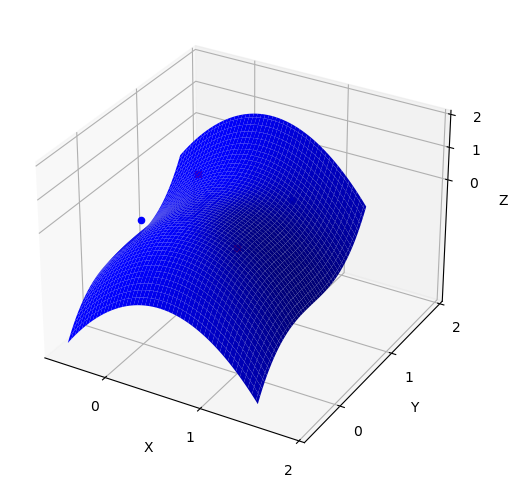

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 산점도 그리기
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(0, 0, 0, color='b', marker='o')
ax.scatter(0, 1, 0, color='r', marker='s')
ax.scatter(1, 0, 0, color='r', marker='s')
ax.scatter(1, 1, 0, color='b', marker='o')

# 비선형 그래프 그리기
x = np.linspace(-0.5, 1.5, 100)
y = np.linspace(-0.5, 1.5, 100)
x, y = np.meshgrid(x, y)
z = -2 * (x - 0.5) ** 2 + 1.5 * (y - 0.5) ** 3

ax.plot_surface(x, y, z, color='b')

ax.set_xticks(np.arange(0, 3, 1))
ax.set_yticks(np.arange(0, 3, 1))
ax.set_zticks(np.arange(0, 3, 1))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


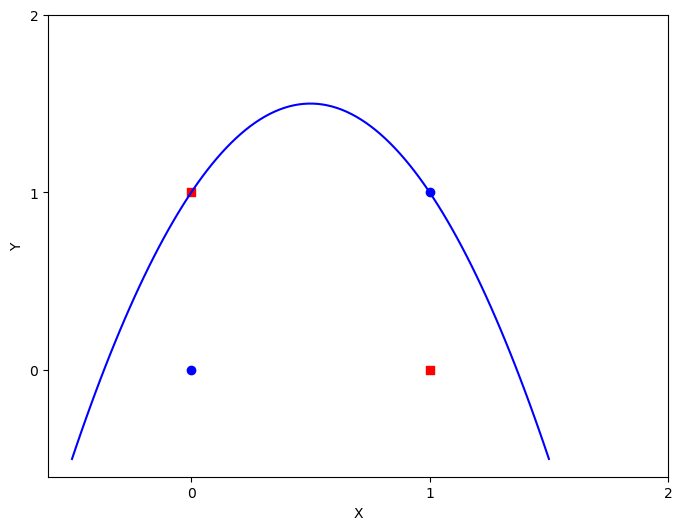

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# 산점도 그리기
plt.figure(figsize=(8, 6))
plt.scatter(x=0, y=0, color='b', edgecolor='b', marker='o')
plt.scatter(x=0, y=1, color='r', edgecolor='r', marker='s')
plt.scatter(x=1, y=0, color='r', edgecolor='r', marker='s')
plt.scatter(x=1, y=1, color='b', edgecolor='b', marker='o')

# 비선형 그래프 그리기
x_curve = np.linspace(-0.5, 1.5, 100)  # x 좌표 범위
y_curve = -2 * (x_curve - 0.5) ** 2 + 1.5  # y 좌표 (파란색 원이 있는 y 좌표)
plt.plot(x_curve, y_curve, color='b')

plt.xticks(np.arange(0, 3, 1))
plt.yticks(np.arange(0, 3, 1))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


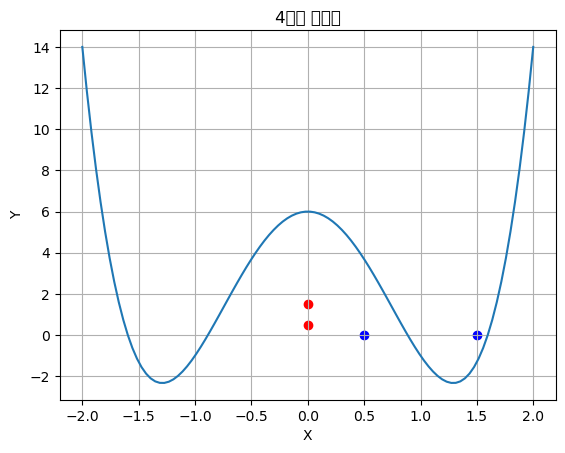

In [31]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 100)  # x 범위 설정
y = 3 * x**4 - 10 * x**2 + 6  # 4차식 그래프 정의

plt.plot(x, y)
plt.scatter(0, 1.5, color='r', marker='o')
plt.scatter(0, 0.5, color='r', marker='o')
plt.scatter(0.5, 0, color='b', marker='o')
plt.scatter(1.5, 0, color='b', marker='o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('4차식 그래프')
plt.grid(True)
plt.show()
#개 열받는다 챗 지피티.. 말을 못알아듣네

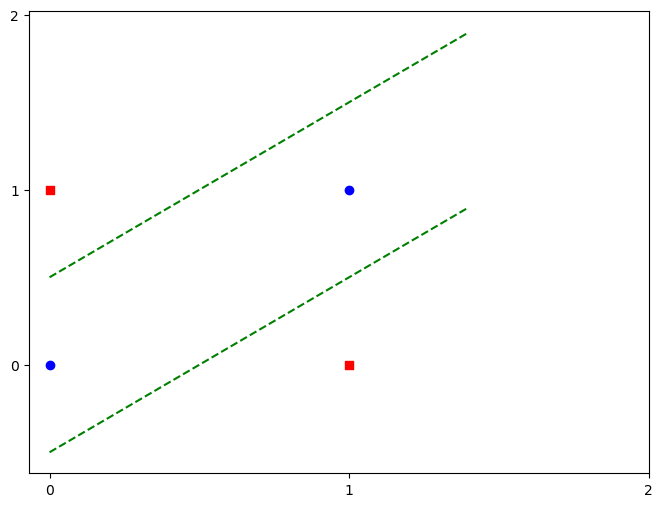

In [32]:
#시각화 구현
x1 = np.arange(0, 1.5, 0.1)
x2 = 1*x1 + 0.5
x3 = 1*x1 - 0.5
plt.figure(figsize=(8,6))
plt.scatter(x=0, y=0, color = 'b', edgecolor='b', marker='o')
plt.scatter(x=0, y=1, color = 'r', edgecolor='r', marker='s')
plt.scatter(x=1, y=0, color='r', edgecolor='r', marker = 's')
plt.scatter(x=1, y=1, color = 'b', edgecolors='b', marker = 'o')
plt.plot(x1, x2, color= 'g', linestyle = '--')
plt.plot(x1, x3, color = 'g', linestyle = '--')
plt.xticks(np.arange(0,3,1))
plt.yticks(np.arange(0,3,1))
plt.show()
#직선으로는 포함될 수 없다. 빨간 점이 포함되려면 비선형 직선을 그릴수 있어야함 or 최소 2개이상인 선을 그려야함